In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install deepxde
import re

import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import cm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 26.8 MB/s 
     |████████████████████████████████| 100 kB 10.5 MB/s 


DeepXDE backend not selected or invalid. Use tensorflow.compat.v1.
Using backend: tensorflow.compat.v1



Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Instructions for updating:
non-resource variables are not supported in the long term



## Safety PDE with data

In [3]:
import scipy.io
mat1 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.1/ground_truth_c01.mat')
mat2 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.2/ground_truth_c02.mat')
mat3 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.5/ground_truth_c05.mat')
mat4 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.8/ground_truth_c08.mat')
mat5 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 1/ground_truth.mat')
mat6 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 2/ground_truth_c2.mat')
mat7 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.3/ground_truth_c03.mat')
mat8 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.7/ground_truth_c07.mat')
mat9 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 1.2/ground_truth_c12.mat')
mat10 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 1.5/ground_truth_c15.mat')

GT_c01 = mat1['F2']
GT_c02 = mat2['F2']
GT_c05 = mat3['F2']
GT_c08 = mat4['F2']
GT_c1 = mat5['F2']
GT_c2 = mat6['F2']
GT_c03 = mat7['F2']
GT_c07 = mat8['F2']
GT_c12 = mat9['F2']
GT_c15 = mat10['F2']

GT_c01.shape # (109, 10000)

GT_c01 = GT_c01[50:109, ::100]
GT_c02 = GT_c02[50:109, ::100]
GT_c05 = GT_c05[50:109, ::100]
GT_c08 = GT_c08[50:109, ::100]
GT_c1 = GT_c1[50:109, ::100]
GT_c2 = GT_c2[50:109, ::100]
GT_c03 = GT_c03[50:109, ::100]
GT_c07 = GT_c07[50:109, ::100]
GT_c12 = GT_c12[50:109, ::100]
GT_c15 = GT_c15[50:109, ::100]

bnd = np.ones([1,100])
bnd.shape # (1, 100)
GT_c01 = np.append(GT_c01, bnd, axis=0)
GT_c02 = np.append(GT_c02, bnd, axis=0)
GT_c05 = np.append(GT_c05, bnd, axis=0)
GT_c08 = np.append(GT_c08, bnd, axis=0)
GT_c1 = np.append(GT_c1, bnd, axis=0)
GT_c2 = np.append(GT_c2, bnd, axis=0)
GT_c03 = np.append(GT_c03, bnd, axis=0)
GT_c07 = np.append(GT_c07, bnd, axis=0)
GT_c12 = np.append(GT_c12, bnd, axis=0)
GT_c15 = np.append(GT_c15, bnd, axis=0)

GT_c2.shape # (60, 100)

(60, 100)

In [4]:
import scipy.io
mat1 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.1/MC10000_c01.mat')
mat2 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.2/MC10000_c02.mat')
mat3 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.5/MC10000_c05.mat')
mat4 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.8/MC10000_c08.mat')
mat5 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 1/MC10000.mat')
mat6 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 2/MC10000_c2.mat')
mat7 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.3/MC10000_c03.mat')
mat8 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 0.7/MC10000_c07.mat')
mat9 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 1.2/MC10000_c12.mat')
mat10 = scipy.io.loadmat('/content/drive/MyDrive/MC data/f(x) = 1.5/MC10000_c15.mat')

MC10000_c01 = mat1['U2']
MC10000_c02 = mat2['U2']
MC10000_c05 = mat3['U2']
MC10000_c08 = mat4['U2']
MC10000_c1 = mat5['U2']
MC10000_c2 = mat6['U2']
MC10000_c03 = mat7['U2']
MC10000_c07 = mat8['U2']
MC10000_c12 = mat9['U2']
MC10000_c15 = mat10['U2']

MC10000_c01.shape # (109, 10000)

MC10000_c01 = MC10000_c01[50:109, ::100]
MC10000_c02 = MC10000_c02[50:109, ::100]
MC10000_c05 = MC10000_c05[50:109, ::100]
MC10000_c08 = MC10000_c08[50:109, ::100]
MC10000_c1 = MC10000_c1[50:109, ::100]
MC10000_c2 = MC10000_c2[50:109, ::100]
MC10000_c03 = MC10000_c03[50:109, ::100]
MC10000_c07 = MC10000_c07[50:109, ::100]
MC10000_c12 = MC10000_c12[50:109, ::100]
MC10000_c15 = MC10000_c15[50:109, ::100]

bnd = np.ones([1,100])
bnd.shape # (1, 100)
MC10000_c01 = np.append(MC10000_c01, bnd, axis=0)
MC10000_c02 = np.append(MC10000_c02, bnd, axis=0)
MC10000_c05 = np.append(MC10000_c05, bnd, axis=0)
MC10000_c08 = np.append(MC10000_c08, bnd, axis=0)
MC10000_c1 = np.append(MC10000_c1, bnd, axis=0)
MC10000_c2 = np.append(MC10000_c2, bnd, axis=0)
MC10000_c03 = np.append(MC10000_c03, bnd, axis=0)
MC10000_c07 = np.append(MC10000_c07, bnd, axis=0)
MC10000_c12 = np.append(MC10000_c12, bnd, axis=0)
MC10000_c15 = np.append(MC10000_c15, bnd, axis=0)

MC10000_c2.shape # (60, 100)

(60, 100)

### Downsampling

In [5]:
GT_down_c01 = GT_c01[4::5,::5]  # state, time
GT_down_c02 = GT_c02[4::5,::5] 
GT_down_c05 = GT_c05[4::5,::5] 
GT_down_c08 = GT_c08[4::5,::5] 
GT_down_c1 = GT_c1[4::5,::5] 
GT_down_c2 = GT_c2[4::5,::5] 
GT_down_c03 = GT_c03[4::5,::5] 
GT_down_c07 = GT_c07[4::5,::5]
GT_down_c12 = GT_c12[4::5,::5] 
GT_down_c15 = GT_c15[4::5,::5] 

GT_down_c2.shape # (12, 20)

(12, 20)

In [6]:
MC10000_down_c01 = MC10000_c01[4::5,::5]  # state, time
MC10000_down_c02 = MC10000_c02[4::5,::5] 
MC10000_down_c05 = MC10000_c05[4::5,::5] 
MC10000_down_c08 = MC10000_c08[4::5,::5] 
MC10000_down_c1 = MC10000_c1[4::5,::5] 
MC10000_down_c2 = MC10000_c2[4::5,::5] 
MC10000_down_c03 = MC10000_c03[4::5,::5] 
MC10000_down_c07 = MC10000_c07[4::5,::5] 
MC10000_down_c12 = MC10000_c12[4::5,::5] 
MC10000_down_c15 = MC10000_c15[4::5,::5] 

MC10000_down_c2.shape # (12, 20)

(12, 20)

In [7]:
observe_x_down = np.mgrid[-9:2.1:1, 0.1:10:0.5].reshape(2,-1).T
observe_x_down.shape # (240, 2)
c01_down = 0.1 * np.ones([240,1])
c01_down.shape # (6000, 1)
observe_x_down_c01 = np.append(observe_x_down, c01_down, axis=1)
observe_x_down_c01.shape # (240, 3)
# observe_x_down_c01 # state, time

(240, 3)

In [8]:
c02_down = 0.2 * np.ones([240,1])
c05_down = 0.5 * np.ones([240,1])
c08_down = 0.8 * np.ones([240,1])
c1_down = 1 * np.ones([240,1])
c2_down = 2 * np.ones([240,1])
c03_down = 0.3 * np.ones([240,1])
c07_down = 0.7 * np.ones([240,1])
c12_down = 1.2 * np.ones([240,1])
c15_down = 1.5 * np.ones([240,1])

observe_x_down_c02 = np.append(observe_x_down, c02_down, axis=1)
observe_x_down_c05 = np.append(observe_x_down, c05_down, axis=1)
observe_x_down_c08 = np.append(observe_x_down, c08_down, axis=1)
observe_x_down_c1 = np.append(observe_x_down, c1_down, axis=1)
observe_x_down_c2 = np.append(observe_x_down, c2_down, axis=1)
observe_x_down_c03 = np.append(observe_x_down, c03_down, axis=1)
observe_x_down_c07 = np.append(observe_x_down, c07_down, axis=1)
observe_x_down_c12 = np.append(observe_x_down, c12_down, axis=1)
observe_x_down_c15 = np.append(observe_x_down, c15_down, axis=1)

In [9]:
observe_func_down_c01 = GT_down_c01.reshape(-1,1)
observe_func_down_c02 = GT_down_c02.reshape(-1,1)
observe_func_down_c05 = GT_down_c05.reshape(-1,1)
observe_func_down_c08 = GT_down_c08.reshape(-1,1)
observe_func_down_c1 = GT_down_c1.reshape(-1,1)
observe_func_down_c2 = GT_down_c2.reshape(-1,1)
observe_func_down_c03 = GT_down_c03.reshape(-1,1)
observe_func_down_c07 = GT_down_c07.reshape(-1,1)
observe_func_down_c12 = GT_down_c12.reshape(-1,1)
observe_func_down_c15 = GT_down_c15.reshape(-1,1)

observe_func_down_c01.shape # (240, 1)

(240, 1)

In [10]:
observe_x = np.vstack([observe_x_down_c01, observe_x_down_c05, observe_x_down_c08, observe_x_down_c1])
observe_func = np.vstack([observe_func_down_c01, observe_func_down_c05, observe_func_down_c08, observe_func_down_c1])

observe_x.shape # (960, 3)
observe_func.shape # (960, 1)
observe_x[:, [2, 1]] = observe_x[:, [1, 2]] # [state, c, time]
observe_x

array([[-9. ,  0.1,  0.1],
       [-9. ,  0.1,  0.6],
       [-9. ,  0.1,  1.1],
       ...,
       [ 2. ,  1. ,  8.6],
       [ 2. ,  1. ,  9.1],
       [ 2. ,  1. ,  9.6]])

### PDE with system parameter

In [11]:
def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, j=2)
    dy_x = dde.grad.jacobian(y, x, j=0)
    dy_xx = dde.grad.hessian(y, x, j=0)
    # Backend tensorflow.compat.v1 or tensorflow
    return (
        dy_t
        - 0.5 * dy_xx
        - x[:, 1:2] * dy_x
    )

In [12]:
observe_x_full = np.mgrid[-9.8:2.1:0.2, 0.1:10.1:0.1].reshape(2,-1).T
observe_x_full.shape # (6000, 2)
c01 = 0.1 * np.ones([6000,1])
c01.shape # (6000, 1)
observe_x_c01 = np.append(observe_x_full, c01, axis=1)
observe_x_c01.shape # (6000, 3)
# observe_x # state, time

(6000, 3)

In [13]:
c02 = 0.2 * np.ones([6000,1])
c05 = 0.5 * np.ones([6000,1])
c08 = 0.8 * np.ones([6000,1])
c1 = 1 * np.ones([6000,1])
c2 = 2 * np.ones([6000,1])
c03 = 0.3 * np.ones([6000,1])
c07 = 0.7 * np.ones([6000,1])
c12 = 1.2 * np.ones([6000,1])
c15 = 1.5 * np.ones([6000,1])

observe_x_c02 = np.append(observe_x_full, c02, axis=1)
observe_x_c05 = np.append(observe_x_full, c05, axis=1)
observe_x_c08 = np.append(observe_x_full, c08, axis=1)
observe_x_c1 = np.append(observe_x_full, c1, axis=1)
observe_x_c2 = np.append(observe_x_full, c2, axis=1)
observe_x_c03 = np.append(observe_x_full, c03, axis=1)
observe_x_c07 = np.append(observe_x_full, c07, axis=1)
observe_x_c12 = np.append(observe_x_full, c12, axis=1)
observe_x_c15 = np.append(observe_x_full, c15, axis=1)

### Training with MC10000

In [15]:
observe_x_down = np.mgrid[-9:2.1:1, 0.1:10:0.5].reshape(2,-1).T
observe_x_down.shape # (240, 2)
c01_down = 0.1 * np.ones([240,1])
c01_down.shape # (6000, 1)
observe_x_down_c01 = np.append(observe_x_down, c01_down, axis=1)
observe_x_down_c01.shape # (240, 3)
# observe_x_down_c01 # state, time

(240, 3)

In [16]:
observe_func_down_c01 = MC10000_down_c01.reshape(-1,1)
observe_func_down_c02 = MC10000_down_c02.reshape(-1,1)
observe_func_down_c05 = MC10000_down_c05.reshape(-1,1)
observe_func_down_c08 = MC10000_down_c08.reshape(-1,1)
observe_func_down_c1 = MC10000_down_c1.reshape(-1,1)
observe_func_down_c2 = MC10000_down_c2.reshape(-1,1)

observe_func_down_c01.shape # (240, 1)

(240, 1)

In [17]:
observe_x = np.vstack([observe_x_down_c01, observe_x_down_c05, observe_x_down_c08, observe_x_down_c1])
observe_func = np.vstack([observe_func_down_c01, observe_func_down_c05, observe_func_down_c08, observe_func_down_c1])

observe_x.shape # (960, 3)
observe_func.shape # (960, 1)
observe_x[:, [2, 1]] = observe_x[:, [1, 2]] # [state, c, time]
observe_x

array([[-9. ,  0.1,  0.1],
       [-9. ,  0.1,  0.6],
       [-9. ,  0.1,  1.1],
       ...,
       [ 2. ,  1. ,  8.6],
       [ 2. ,  1. ,  9.1],
       [ 2. ,  1. ,  9.6]])

In [18]:
observe_y = dde.icbc.PointSetBC(observe_x, observe_func, component=0)

# geom = dde.geometry.Cuboid([-10, 0], [2, 1])
geom = dde.geometry.Cuboid([-10, 0], [2, 2]) # v \in [0,2]
timedomain = dde.geometry.TimeDomain(0, 10)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [observe_y],
    num_domain=600,
    # num_boundary=20,
    # num_initial=10,
    anchors=observe_x,
)

In [ ]:
layer_size = [3] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model_MC10000 = dde.Model(data, net)

model_MC10000.compile(
    "adam", lr=0.001
)
variable = dde.callbacks.VariableValue([], period=1000)
model_MC10000.train(epochs=60000, callbacks=[variable])

Compiling model...
Building feed-forward neural network...
'build' took 0.067918 s

'compile' took 0.551046 s



In [19]:
layer_size = [3] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model_MC10000 = dde.Model(data, net)

model_MC10000.compile(
    "adam", lr=0.001
)
model_MC10000.restore('/content/drive/MyDrive/DeepXDE models/Varying/model_MC10000_0-2/model_MC10000_0-2-60000.ckpt')

Compiling model...
Building feed-forward neural network...
'build' took 0.118460 s



/usr/local/lib/python3.7/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:110: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_constraint=self.kernel_constraint,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.832250 s



In [41]:
test_x = np.copy(observe_x_c07)
test_x[:, [2, 1]] = test_x[:, [1, 2]] # [state, c, time]
test_x.shape # (6000, 3)

yhat = model_MC10000.predict(test_x)
predict_c07 = yhat.reshape(60,-1)
predict_c07.shape

(60, 100)

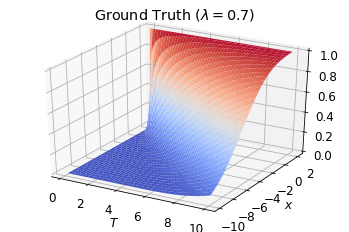

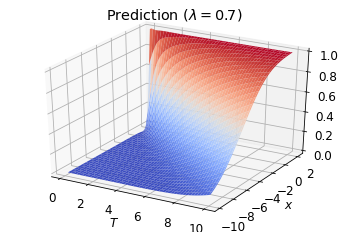

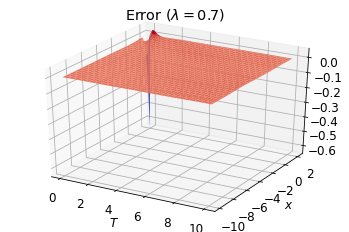

In [42]:
x = np.linspace(0.1,10,100)
y = np.linspace(-9.8,2,60)

X, Y = np.meshgrid(x, y)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, GT_c07, cmap=cm.coolwarm) # X: time, Y: state
ha.set_title("Ground Truth ($\lambda=0.7$)")
ha.set_xlabel('$T$')
ha.set_ylabel('$x$')

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, predict_c07, cmap=cm.coolwarm) # X: time, Y: state
ha.set_title("Prediction ($\lambda=0.7$)")
ha.set_xlabel('$T$')
ha.set_ylabel('$x$')

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, GT_c07-predict_c07, cmap=cm.coolwarm) # X: time, Y: state
ha.set_title("Error ($\lambda=0.7$)")
ha.set_xlabel('$T$')
ha.set_ylabel('$x$')

plt.show()

In [39]:
test_x = np.copy(observe_x_c15)
test_x[:, [2, 1]] = test_x[:, [1, 2]] # [state, c, time]
test_x.shape # (6000, 3)

yhat = model_MC10000.predict(test_x)
predict_c15 = yhat.reshape(60,-1)

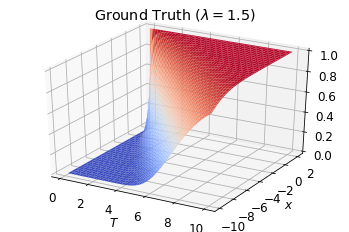

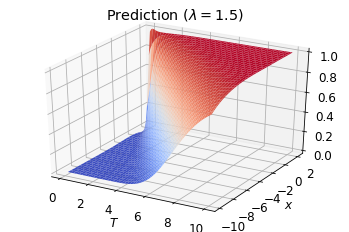

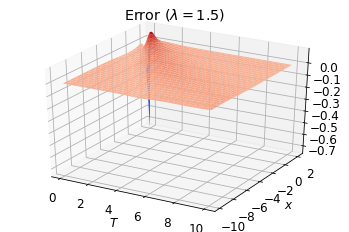

In [40]:
x = np.linspace(0.1,10,100)
y = np.linspace(-9.8,2,60)

X, Y = np.meshgrid(x, y)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, GT_c15, cmap=cm.coolwarm) # X: time, Y: state
ha.set_title("Ground Truth ($\lambda=1.5$)")
ha.set_xlabel('$T$')
ha.set_ylabel('$x$')

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, predict_c15, cmap=cm.coolwarm) # X: time, Y: state
ha.set_title("Prediction ($\lambda=1.5$)")
ha.set_xlabel('$T$')
ha.set_ylabel('$x$')

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, GT_c15-predict_c15, cmap=cm.coolwarm) # X: time, Y: state
ha.set_title("Error ($\lambda=1.5$)")
ha.set_xlabel('$T$')
ha.set_ylabel('$x$')

plt.show()